In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
# Load dataset
df_bank = pd.read_csv('../bank.csv')
df_bank = df_bank.drop(columns=['duration'], axis=1)
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [4]:
df_bank.describe()

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [5]:
df_bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,3.000000,20.750000,1.000000,NaN,NaN


# 01. 전처리

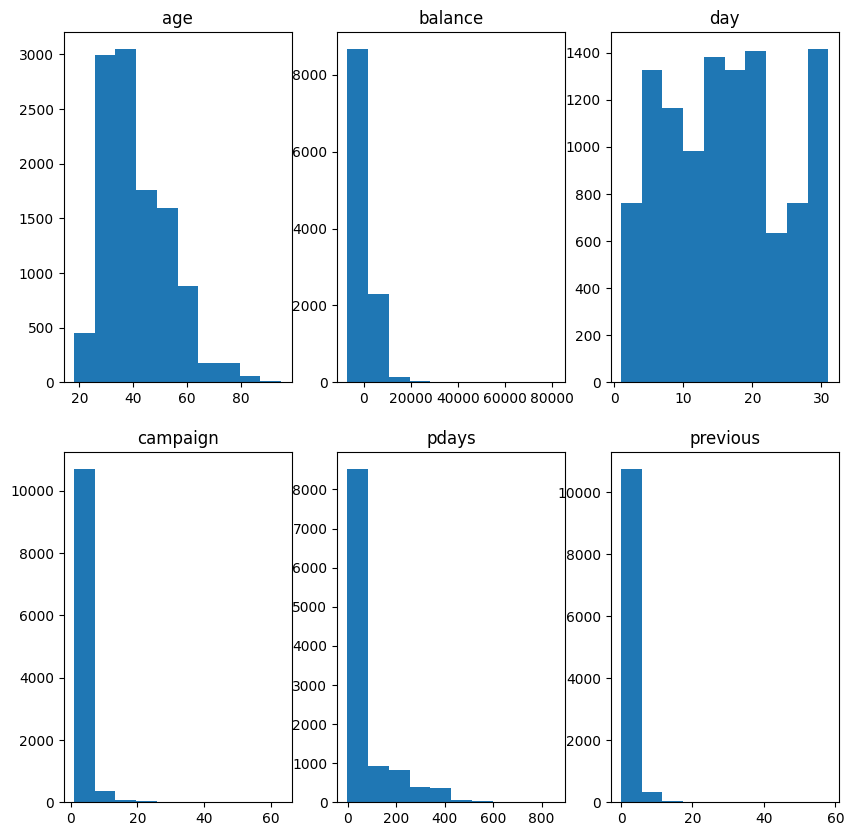

In [6]:
# 수치형 변수들 분포

for i,j in enumerate(['age', 'balance', 'day', 'campaign', 'pdays', 'previous']) :
    plt.subplot(2,3,i+1)
    plt.hist(df_bank[j], bins=10)
    plt.title(j)
plt.show()

In [7]:
df_bank2 = df_bank.copy()

In [8]:
# 데이터 옮기기
df_bank2['balance'] = df_bank2['balance'] + abs(df_bank2['balance'].min())
df_bank2['pdays'] = df_bank2['pdays'] + abs(df_bank2['pdays'].min())

In [9]:
# 로그변환

df_bank2['balance'] = np.log1p(df_bank2['balance'])
df_bank2['campaign'] = np.log1p(df_bank2['campaign'])
df_bank2['pdays'] = np.log1p(df_bank2['pdays'])
df_bank2['previous'] = np.log1p(df_bank2['previous'])

In [10]:
df_bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,9.125980,yes,no,unknown,5,may,0.693147,0.000000,0.000000,unknown,yes
1,56,admin.,married,secondary,no,8.838262,no,no,unknown,5,may,0.693147,0.000000,0.000000,unknown,yes
2,41,technician,married,secondary,no,9.001839,yes,no,unknown,5,may,0.693147,0.000000,0.000000,unknown,yes
3,55,services,married,secondary,no,9.140347,yes,no,unknown,5,may,0.693147,0.000000,0.000000,unknown,yes
4,54,admin.,married,tertiary,no,8.858226,no,no,unknown,5,may,1.098612,0.000000,0.000000,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,8.831858,yes,no,cellular,20,apr,0.693147,0.000000,0.000000,unknown,no
11158,39,services,married,secondary,no,8.933400,no,no,unknown,16,jun,1.609438,0.000000,0.000000,unknown,no
11159,32,technician,single,secondary,no,8.835938,no,no,cellular,19,aug,1.098612,0.000000,0.000000,unknown,no
11160,43,technician,married,secondary,no,8.831712,no,yes,cellular,8,may,1.098612,5.159055,1.791759,failure,no


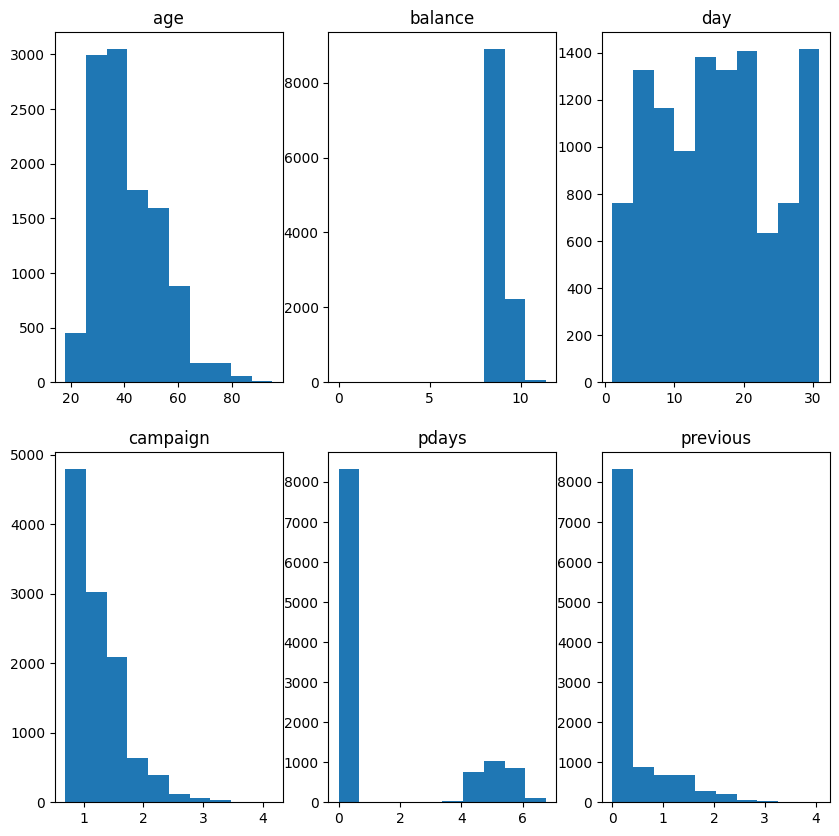

In [11]:
# 분포 재확인

for i,j in enumerate(['age', 'balance', 'day', 'campaign', 'pdays', 'previous']) :
    plt.subplot(2,3,i+1)
    plt.hist(df_bank2[j], bins=10)
    plt.title(j)
plt.show()

In [6]:
#df_bank['pdays'] = np.where(df_bank['pdays'] == -1, 'no','yes')
# df_bank

# 02. EDA

In [12]:
df_bank3 = df_bank2.drop(columns=['deposit'], axis=1)
df_bank3 = pd.get_dummies(df_bank3, columns=['job','marital', 'education', 'default', 'housing','loan','contact','month','poutcome'], dtype='int')
df_bank3

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,9.125980,5,0.693147,0.000000,0.000000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,8.838262,5,0.693147,0.000000,0.000000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,9.001839,5,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,9.140347,5,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,8.858226,5,1.098612,0.000000,0.000000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,8.831858,20,0.693147,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,8.933400,16,1.609438,0.000000,0.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,8.835938,19,1.098612,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,8.831712,8,1.098612,5.159055,1.791759,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_bank3 = pd.DataFrame(scaler.fit_transform(df_bank3), columns=df_bank3.columns)


pca = PCA(n_components=3)

pca.fit(df_bank3)
pca_trans = pd.DataFrame(pca.transform(df_bank3), columns=['PCA1','PCA2', 'PCA3'])
pca_trans['deposit'] = df_bank['deposit']
pca_trans

,PCA1,PCA2,PCA3,deposit
0,1.574177,-0.240237,0.128601,yes
1,0.646387,-0.979280,0.133551,yes
2,1.541364,-0.224685,0.152163,yes
3,1.581782,-0.243832,0.190043,yes
4,0.123757,-0.438873,1.033655,yes
...,...,...,...,...
11157,0.406175,0.588152,0.076680,no
11158,0.381675,-1.239594,0.233051,no
11159,-0.588967,-0.327743,-0.497250,no
11160,-0.142273,-0.231843,-1.264749,no


<Axes: xlabel='PCA1', ylabel='PCA2'>

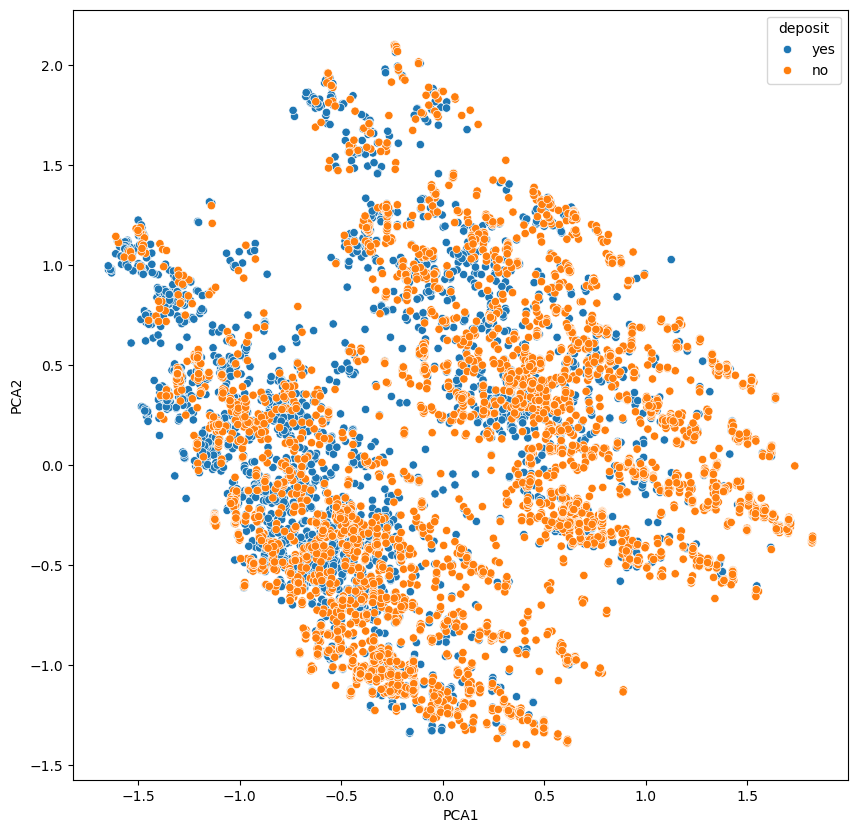

In [62]:
sns.scatterplot(x = pca_trans['PCA1'], y = pca_trans['PCA2'], hue=pca_trans['deposit'])

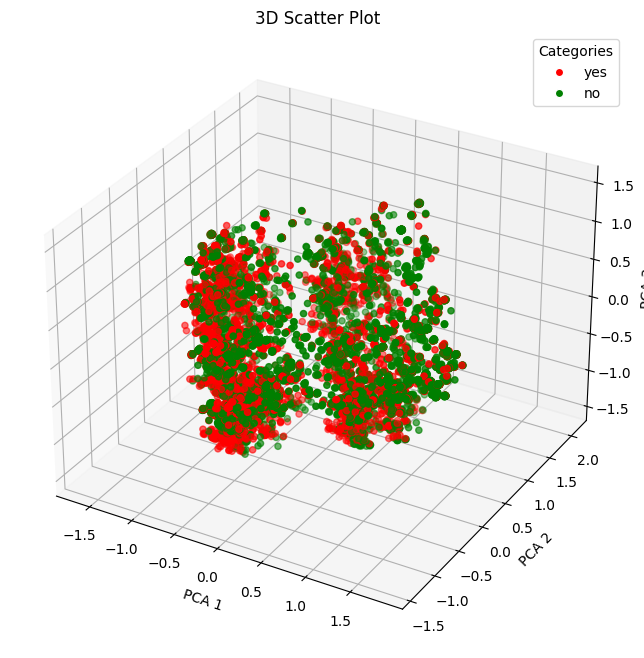

In [14]:
# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 카테고리별로 색상 지정
colors = {'yes': 'r', 'no': 'g'}
ax.scatter(pca_trans['PCA1'], pca_trans['PCA2'], pca_trans['PCA3'], 
           c=pca_trans['deposit'].map(colors), 
           label=pca_trans['deposit'])

# 축 레이블 설정
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot')

# 범례 추가
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=value) for key, value in colors.items()]
ax.legend(handles=handles, title="Categories")

In [16]:
from pycaret.classification import *

# PyCaret 설정
clf = setup(df_bank2, target = 'deposit', train_size = 0.8, 
            normalize = True, normalize_method='zscore',
            session_id = 123)

,Description,Value
0,Session id,123
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(11162, 16)"
5,Transformed data shape,"(11162, 48)"
6,Transformed train set shape,"(8929, 48)"
7,Transformed test set shape,"(2233, 48)"
8,Numeric features,6
9,Categorical features,9


In [17]:
# 여러 모델 비교
top3_models = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7345,0.7914,0.7345,0.7416,0.7302,0.4618,0.4717,0.4100
lightgbm,Light Gradient Boosting Machine,0.7323,0.7903,0.7323,0.7376,0.7289,0.4582,0.4659,0.1940
rf,Random Forest Classifier,0.7224,0.7808,0.7224,0.7240,0.7204,0.4397,0.4431,0.3100
ada,Ada Boost Classifier,0.7167,0.7731,0.7167,0.7221,0.7126,0.4261,0.4343,0.2050
lr,Logistic Regression,0.7039,0.7643,0.7039,0.7095,0.6992,0.3998,0.4085,0.5530
ridge,Ridge Classifier,0.7037,0.7637,0.7037,0.7097,0.6987,0.3992,0.4084,0.0870
lda,Linear Discriminant Analysis,0.7037,0.7637,0.7037,0.7097,0.6987,0.3992,0.4084,0.0960
et,Extra Trees Classifier,0.6975,0.7545,0.6975,0.6978,0.6961,0.3904,0.3922,0.3250
nb,Naive Bayes,0.6773,0.7374,0.6773,0.6945,0.6646,0.3412,0.3636,0.0720
knn,K Neighbors Classifier,0.6807,0.7241,0.6807,0.6811,0.6788,0.3561,0.3583,0.1020


In [18]:
from pycaret.datasets import get_data
from pycaret.classification import setup, get_config

X_train = get_config('X_train_transformed')
y_train = get_config('y_train_transformed')
X_test = get_config('X_test_transformed')
y_test = get_config('y_test_transformed')

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

models = [top3_models[0], top3_models[1], top3_models[2]]
voting_clf = VotingClassifier(estimators=[('GBC', models[0]), ('LGBMC', models[1]), ('RFC', models[2])], voting='hard')

# 모델 훈련
voting_clf.fit(X_train, y_train)

# 예측 및 평가
predictions = voting_clf.predict(X_test)
print(classification_report(y_test, predictions))

[LightGBM] [Info] Number of positive: 4231, number of negative: 4698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473849 -> initscore=-0.104699
[LightGBM] [Info] Start training from score -0.104699
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1175
           1       0.78      0.63      0.70      1058

    accuracy                           0.74      2233
   macro avg       0.75      0.73      0.73      2233
weighted avg       0.74      0.74      0.74      2233



In [20]:
from sklearn.ensemble import VotingClassifier

# 상위 3개 모델로 Voting Classifier 생성
models = [top3_models[0], top3_models[1], top3_models[2]]
voting_clf = VotingClassifier(estimators=[('GBC', models[0]), ('LGBMC', models[1]), ('RFC', models[2])], voting='soft')

# 모델 훈련
voting_clf.fit(X_train, y_train)

# 예측 및 평가
predictions = voting_clf.predict(X_test)
print(classification_report(y_test, predictions))

[LightGBM] [Info] Number of positive: 4231, number of negative: 4698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473849 -> initscore=-0.104699
[LightGBM] [Info] Start training from score -0.104699
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1175
           1       0.77      0.64      0.70      1058

    accuracy                           0.74      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.74      0.74      2233



In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, 
                           scoring='accuracy', cv=10, n_jobs=-1)

# 모델 훈련
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [22]:
grid_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
from sklearn.metrics import classification_report

preds = grid_search.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1175
           1       0.77      0.64      0.70      1058

    accuracy                           0.74      2233
   macro avg       0.75      0.73      0.73      2233
weighted avg       0.74      0.74      0.74      2233



In [24]:
top3_models[0]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [26]:
rf_eval = evaluate_model(top3_models[0], X_test, y_test)
best_grid_eval = evaluate_model(grid_search, X_test, y_test)

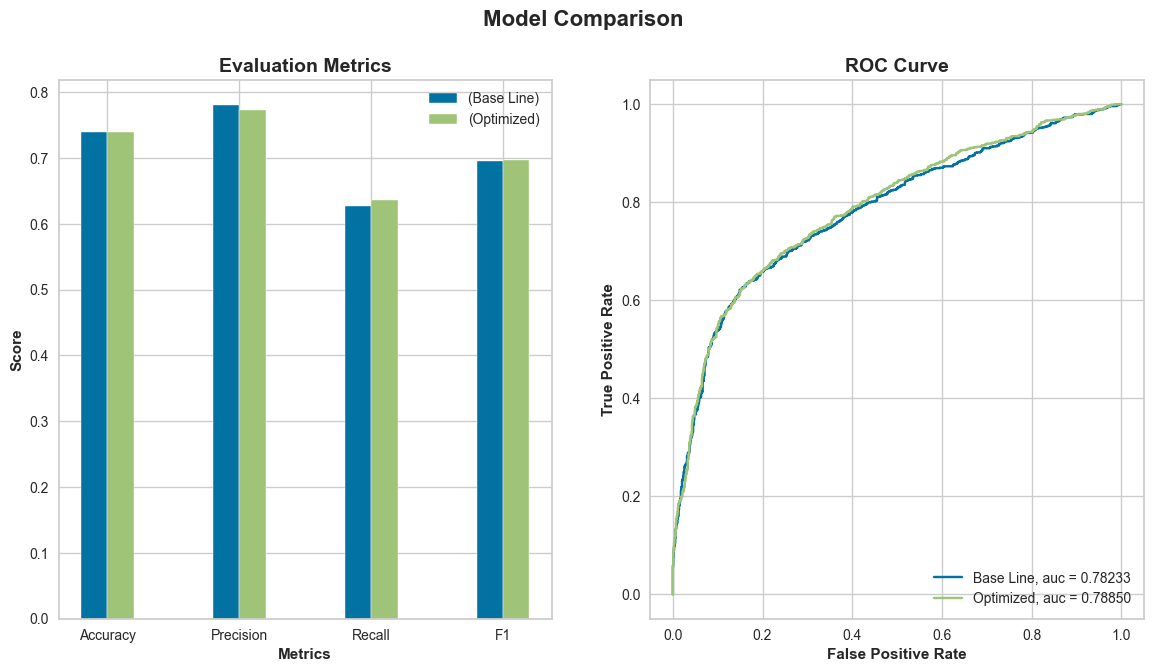

In [27]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='(Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='(Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Base Line, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Optimized, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()